In [ ]:
"""

This is a credit card dataset courtesy of 

https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud/discussion/328121

Here is the rundown of the dataset from the source: 

About the Dataset

Digital payments are evolving, but so are cyber criminals.

According to the Data Breach Index, more than 5 million records are being stolen on a daily basis, a concerning statistic that shows - fraud is still very common both for Card-Present and Card-not Present type of payments.

In today’s digital world where trillions of Card transaction happens per day, detection of fraud is challenging.

This Dataset sourced by some unnamed institute.

Feature Explanation:

distance_from_home - the distance from home where the transaction happened.

distance_from_last_transaction - the distance from last transaction happened.

ratio_to_median_purchase_price - Ratio of purchased price transaction to median purchase price.

repeat_retailer - Is the transaction happened from same retailer.

used_chip - Is the transaction through chip (credit card).

used_pin_number - Is the transaction happened by using PIN number.

online_order - Is the transaction an online order.

fraud - Is the transaction fraudulent.
"""

In [26]:

# Retrieve packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline


In [27]:
# Set up data source as a variable

data = "C:\Portfolio\Data Engineer Track\Thinkful\Random Forest Challenge\card_transdata.csv"

In [28]:
# Also, setting up DataFrame variable

df = pd.read_csv(data)

In [29]:
# Showing the first five columns to reviews the features

df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [41]:
# Viewing information about each variable 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [30]:
# Packages for generating the tree

import pydotplus
import graphviz

In [31]:
# The decision tree learning package
from sklearn import tree

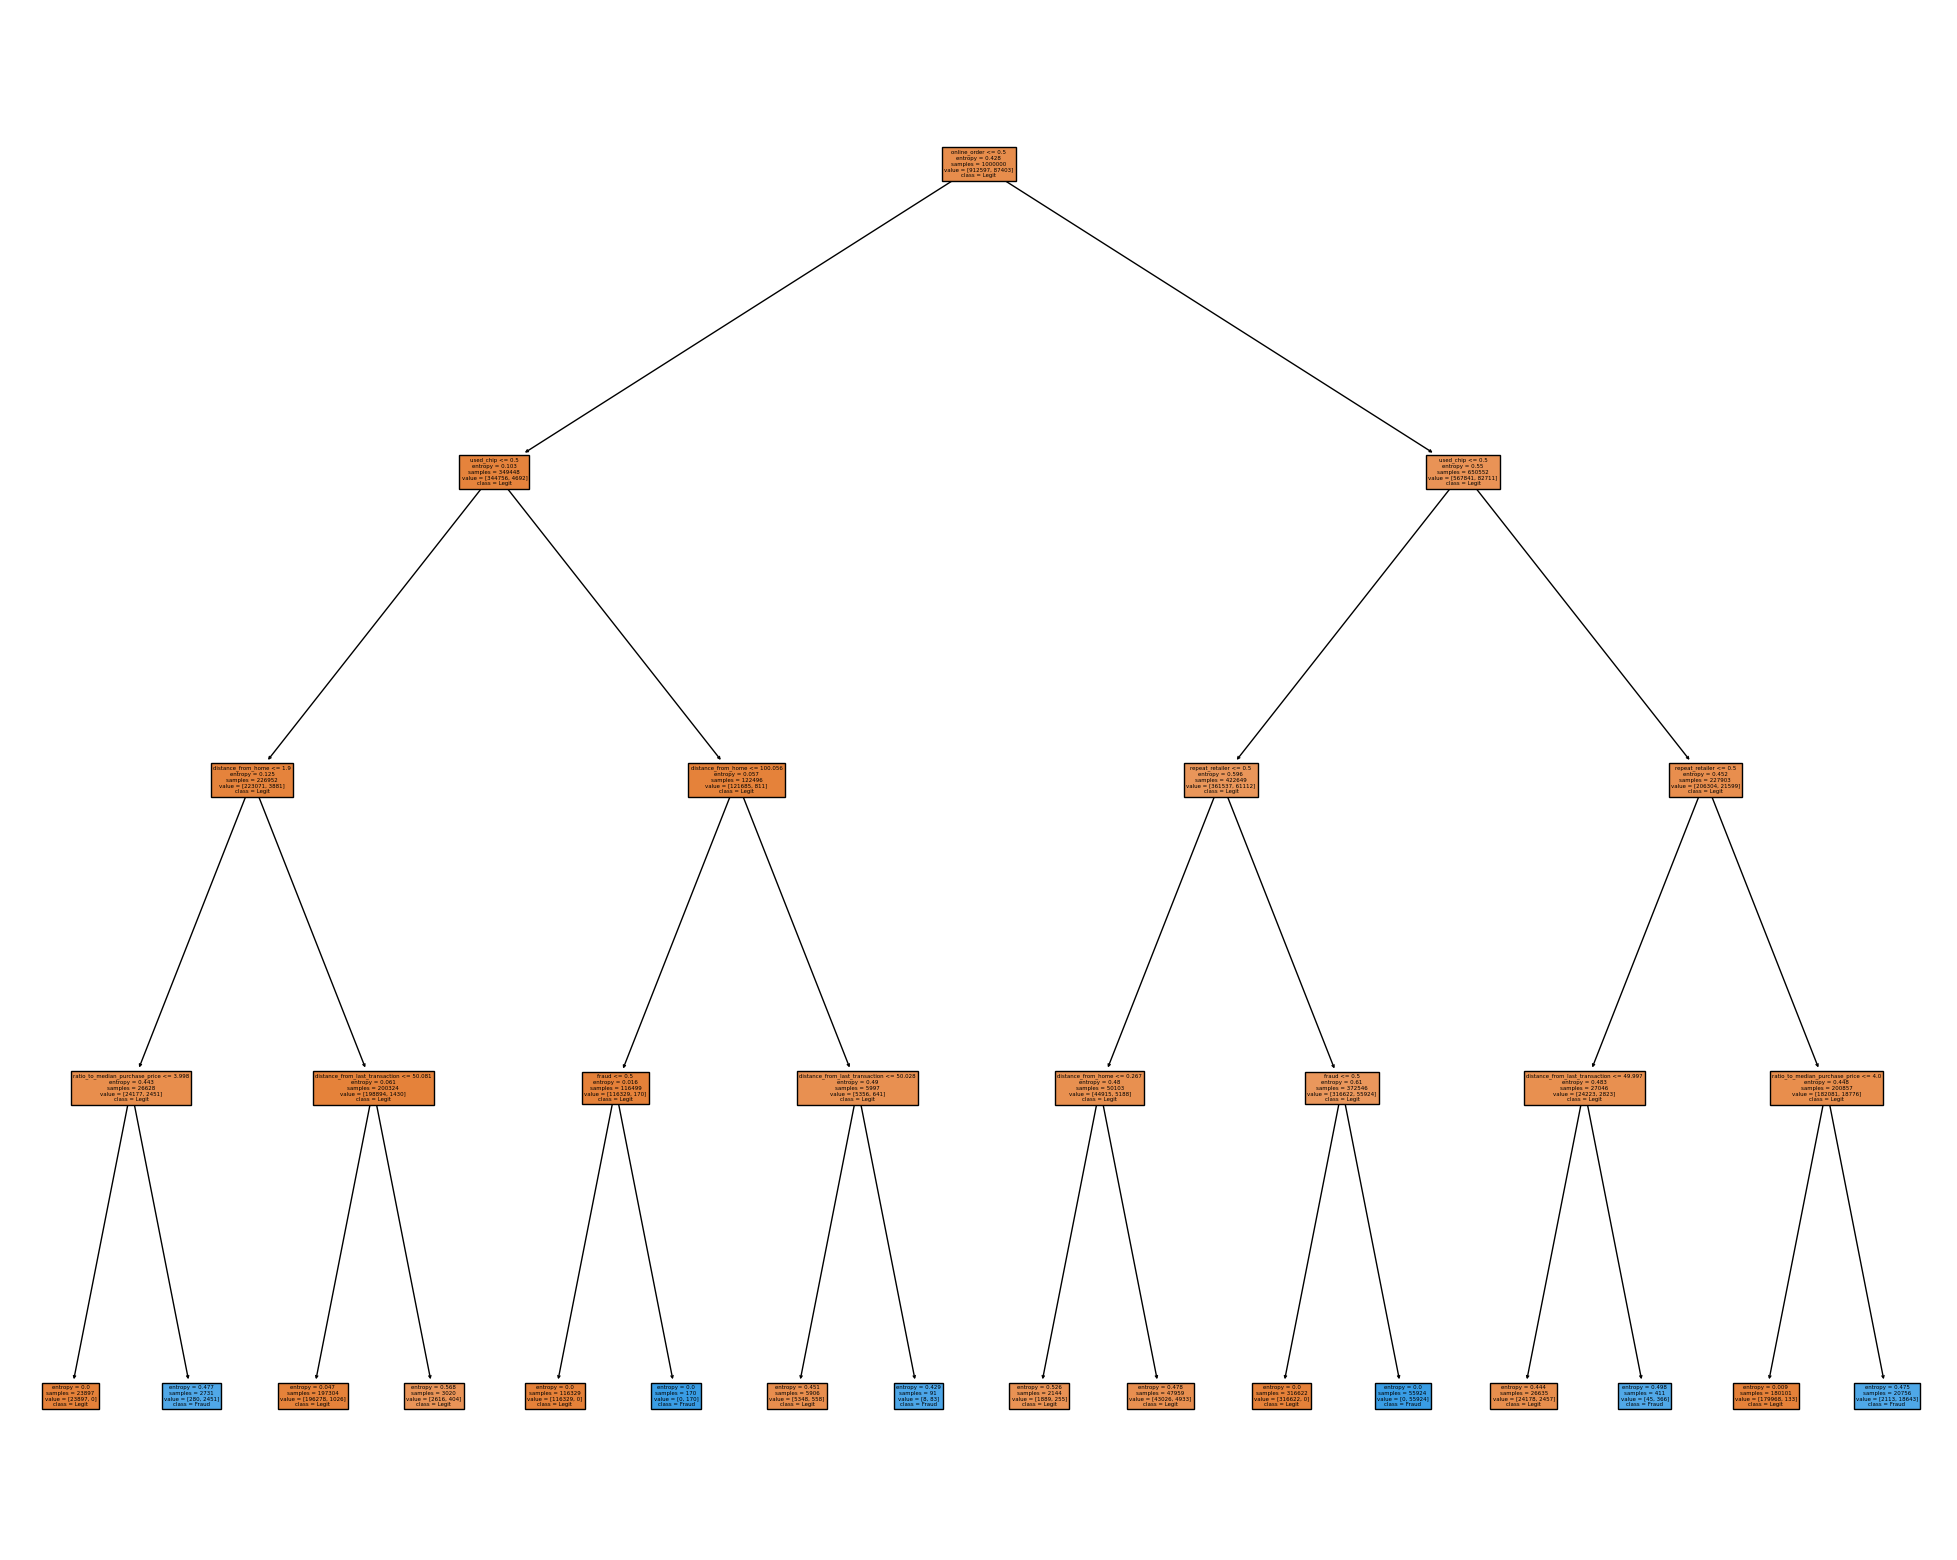

In [59]:
# Start up and train the tree

decision_tree = tree.DecisionTreeClassifier(
criterion = "entropy",
max_features = 1,
max_depth = 4,
random_state = 1234
)
decision_tree.fit(df, df["fraud"])



fig = plt.figure(figsize = (25,20))
a = tree.plot_tree(decision_tree,
                  feature_names = df.columns,
                  class_names = ["Legit", "Fraud"],
                  filled = True)

In [ ]:
# Random Forest

In [57]:
# Import packages for the Random Forest model

from sklearn import ensemble
from sklearn.model_selection import cross_val_score
import time

# Set up variables

start = time.time()

rfc = ensemble.RandomForestClassifier(n_estimators=10, n_jobs=-1)
X = df.drop('fraud', 1)
Y = df['fraud']

print(f'{cross_val_score(rfc, X, Y, cv=10)}\n')

print(f'Cross-validation time elapsed: {round(time.time() - start, 2)} seconds.')

C:\Users\rakim\AppData\Local\Temp\ipykernel_41136\1140388404.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('fraud', 1)


[0.99997 0.99999 1.      0.99999 0.99998 1.      0.99997 0.99998 1.
 0.99998]

Cross-validation time elapsed: 24.31 seconds.


In [ ]:
# The estimated out-of-sample accuracy is about 99% and nearly 100%. The model
# took 24.31 seconds to run. 

<AxesSubplot:>

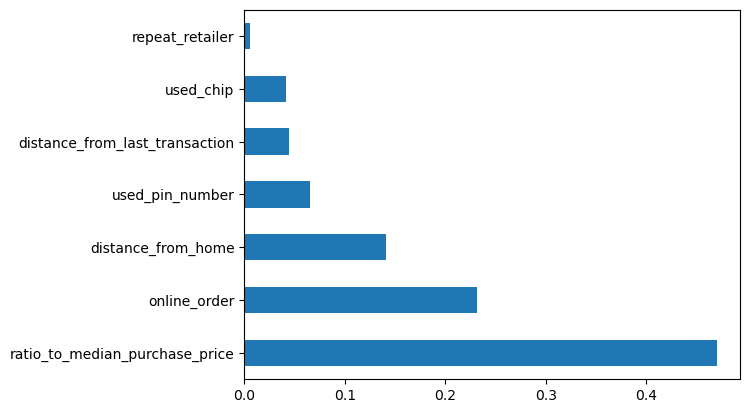

In [58]:
# Show most important features 

import matplotlib.pyplot as plt

rfc.fit(X, Y)

feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [ ]:
"""The most important features appear to be ratio_to_median_purchase_price,
online_order, and distance_from_home. 

In addition, for the decision tree: It appears the lower the number for ratio_to_median_purchase_price, distance_from_home,
and distance_from_last_transaction, the more likely the transaction is legit. 

"""